# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)  # results show 249 rows
study_results = pd.read_csv(study_results_path)    # results show 1893 rows

# Combine the data into a single DataFrame

            # Instructions shou using indexing of study_results; left = study_results & right = mouse_metadata
combined_df = pd.merge(study_results, mouse_metadata, how='left', on=['Mouse ID'], sort=False)  # results show 1893 rows

# Display the data table for preview
combined_df.head()

# good to go

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# mine
# https://www.w3schools.com/python/pandas/
# general overview; steps of analysis shown in blocks 
# mouse_metadata
# study_results
# combined_df_study
# dataframe.nunique(axis, dropna) axis= 0, 1. 'index', 'columns', dropna = True, False
# https://www.w3schools.com/python/pandas/ref_df_nunique.asp
# mouse_metadata.nunique()
# study_results.nunique()
combined_df['Timepoint'].unique()
# mouse_metadata.head(25)
# study_results.head(25)
# combined_df.head(25)
# combined_df.dtypes
# mouse_metadata.dtypes
# study_results.dtypes
#combined_df.dtypes
combined_df.groupby(['Tumor Volume (mm3)', 'Drug Regimen'])['Tumor Volume (mm3)'].unique()


Tumor Volume (mm3)  Drug Regimen
22.050126           Ramicane        [22.05012627]
23.343598           Capomulin       [23.34359787]
24.365505           Ramicane        [24.36550471]
25.472143           Capomulin       [25.47214326]
26.546993           Ramicane        [26.54699343]
                                        ...      
75.113288           Naftisol        [75.11328801]
75.123690           Stelasyn        [75.12368955]
75.294936           Ketapril         [75.2949359]
76.668817           Naftisol        [76.66881742]
78.567014           Ketapril        [78.56701362]
Name: Tumor Volume (mm3), Length: 1653, dtype: object

In [3]:
# Checking the number of mice.
combined_df['Mouse ID'].nunique()


# good to go



249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.


######################## DROP before SUBMITTING ##############
# No need to convert Timepoint to object from int64 to match Mouse ID 
# combined_df['Timepoint'] = combined_df['Timepoint'].astype(object)
# print(combined_df_study.dtypes)
######################## DROP before SUBMITTING ##############

            # Identify dupliate rows
duplicateRows = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]

            # find the unique names of the duplicate rows in Mouse ID
duplicateRows['Mouse ID'].unique()


# good to go


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows1 = combined_df.loc[combined_df['Mouse ID'] == 'g989',:]
duplicateRows1


# good to go


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df.drop(combined_df.index[combined_df['Mouse ID'] == 'g989'], inplace=True)
combined_df.head()


# good to go


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
combined_df['Mouse ID'].nunique()


# good to go


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

import numpy as np

drug_tumor_mean = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].mean()
drug_tumor_median = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].median()
drug_tumor_var = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].var()
drug_tumor_std = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].std()
drug_tumor_sem = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].sem()

drug_tumor_concat_df = pd.concat([
    drug_tumor_mean.rename('Mean Tumor Volume'),
    drug_tumor_median.rename('Median Tumor Volume'), 
    drug_tumor_var.rename('Tumor Volume Variance'), 
    drug_tumor_std.rename('Tumor Volume Std. Dev.'), 
    drug_tumor_sem.rename('Tumor Volume Std. Err.')
], axis=1)

drug_tumor_concat_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

            # For personal knowledge, here's a table generated in two lines to understand the flow of syntax for generating one line
                #aggfuncs = [ 'mean', 'median', 'std', 'var', 'sem']
                #combined_df.groupby('Drug Regimen', dropna=False)['Tumor Volume (mm3)'].agg(aggfuncs)

            # For personal knowledge, here are styles generated in two lines to understand the flow of syntax for generating one line
                # #styles = [dict(selector='caption',
                # props=[('text-align', 'right'),
                #        ('font-weight', 'bold')])]
                # df.style.set_caption('Members').set_table_styles(styles)

combined_df.style.set_caption('Tumor Volume (mm3)')

            # Here's the answer to the challenge of this cell!
combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'std', 'var', 'sem']).style.set_caption('Tumor Volume (mm3)').set_table_styles([dict(selector='caption',props=[('text-align', 'right'),('font-weight', 'bold')])])


,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar and Pie Charts

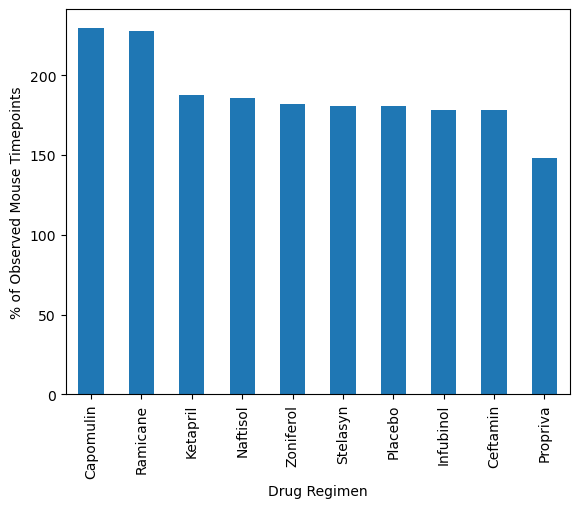

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

            # The following produces same table except Placebo & Stelansyn and Ceftamin & Infubinol are in different sequnence.
            # regimen_mouse_timepoints_df = combined_df.groupby(combined_df['Drug Regimen'], as_index=True, sort=True)['Tumor Volume (mm3)'].count().sort_values(ascending=False)

regimen_mouse_timepoints_df = combined_df['Drug Regimen'].value_counts()
regimen_mouse_timepoints_df.plot(kind='bar', figsize=(6.5,5))
plt.xlabel('Drug Regimen')           
plt.ylabel('% of Observed Mouse Timepoints')
plt.show()


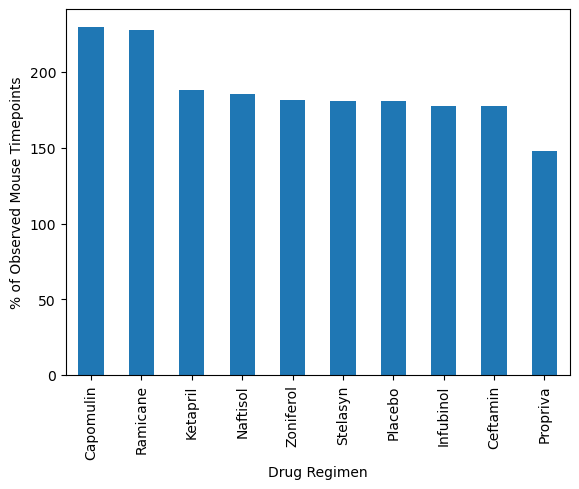

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_mouse_timepoints_df.plot(kind='bar', ylabel='% of Observed Mouse Timepoints', xlabel='Drug Regimen', figsize=(6.5, 4.75))
plt.show()



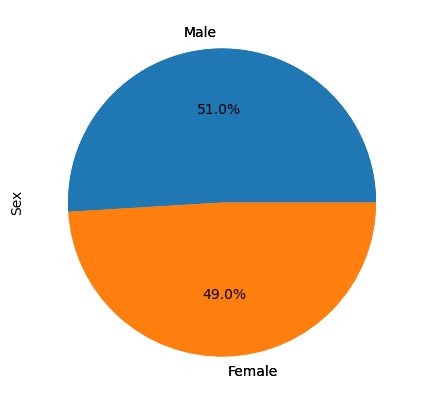

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse_timepoints_df = combined_df.groupby(combined_df['Sex'], as_index=True, sort=True)['Sex'].count().sort_values(ascending=False)
sex_mouse_timepoints_df.plot(kind='pie', figsize=(6.5,5))
sex_mouse_timepoints_pandas_df = sex_mouse_timepoints_df.plot(kind= 'pie', y='Sex',autopct='%.1f%%')

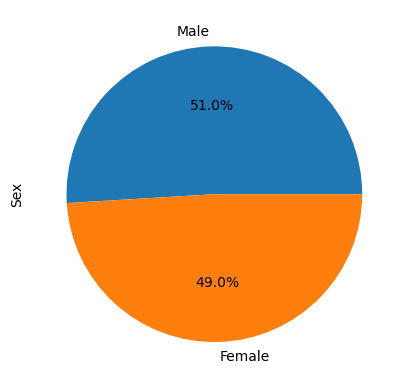

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_mouse_timepoints_df.plot(kind='pie', autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint_df = combined_df.groupby(['Mouse ID'], as_index=True, sort=True)['Timepoint'].max() 

            # Moving the Mouse ID from index to first column to prep for merge; index resets to 0
mouse_timepoint_df = mouse_timepoint_df.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_combinied_df = mouse_timepoint_df.merge(combined_df, on=['Mouse ID', 'Timepoint'], how='left')


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']    # no need to drop other siz drugs

# Create empty list to fill with tumor vol data (for plotting)
subset_accum = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:     # for each drug in list of treatments

    # Locate the rows which contain mice on each drug and get the tumor volumes
    per_drug_tumor_vol = merged_combinied_df.loc[merged_combinied_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset 
    subset_accum.append(per_drug_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = per_drug_tumor_vol.quantile([0.25, 0.50, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq 
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = per_drug_tumor_vol.loc[(per_drug_tumor_vol < lower_bound) | (per_drug_tumor_vol > upper_bound)]
    print(f"{drug}'s potential ouliers: {outliers}")


Capomulin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential ouliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential ouliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


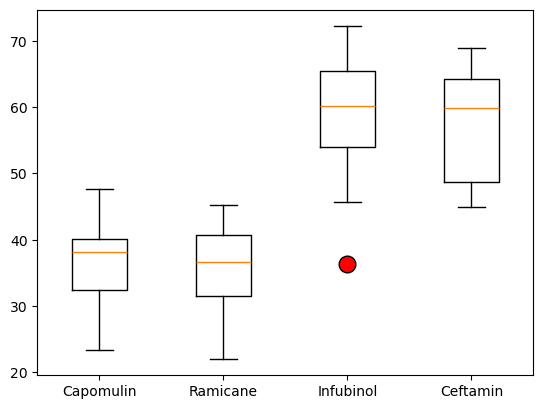

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots(figsize=(6.4,4.75))

                # rectangular box plot
ax1.boxplot(subset_accum,
            vert=True,               # vertical box alignment
            patch_artist=False,      # don't fill boxes with color
            labels=treatments,
            flierprops={'marker': 'o', 'markersize': 12, 'markerfacecolor': 'red'}   # produces red outlier circle symbol 
           ) 
plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
